# TRIGA Mark II Reactor

In [1]:
import os

import numpy as np
import openmc

## Materials

In [3]:
# Nomenclature for thermal libraries: https://docs.openmc.org/en/stable/_modules/openmc/data/thermal.html

T_ref_w = 294 # (K)
T_ref_f = 294 # (K)
T_ref_struct = 294 # (K)

# Water
Water = openmc.Material(name='Water')
Water.set_density('g/cm3',0.9985)
Water.add_nuclide('H1', 2, 'ao')
Water.add_nuclide('O16', 1, 'ao')
Water.add_s_alpha_beta('c_H_in_H2O')
Water.temperature = T_ref_w # (K)

# Fuel 101 @ Pavia 
Fuel101 = openmc.Material(name='Fuel 101')
Fuel101.set_density('g/cm3', 6.3)
Fuel101.add_nuclide('U235', 1.58, 'wo')
Fuel101.add_nuclide('U238', 6.42, 'wo')
Fuel101.add_nuclide('H1', 1, 'wo')
Fuel101.add_nuclide('Zr90', 46.1, 'wo')
Fuel101.add_nuclide('Zr91', 10.2, 'wo')
Fuel101.add_nuclide('Zr92', 15.7, 'wo')
Fuel101.add_nuclide('Zr94', 16.3, 'wo')
Fuel101.add_nuclide('Zr96', 2.68, 'wo')
Fuel101.add_s_alpha_beta('c_H_in_ZrH')
#Fuel101.add_s_alpha_beta('c_Zr_in_ZrH')
Fuel101.temperature = T_ref_f

# Fuel 103 @ Pavia 
Fuel103 = openmc.Material(name='Fuel 103')
Fuel103.set_density('g/cm3', 5.95)
Fuel103.add_nuclide('U235', 1.58, 'wo')
Fuel103.add_nuclide('U238', 6.42, 'wo')
Fuel103.add_nuclide('H1', 1.59, 'wo')
Fuel103.add_nuclide('Zr90', 45.8, 'wo')
Fuel103.add_nuclide('Zr91', 10.1, 'wo')
Fuel103.add_nuclide('Zr92', 15.6, 'wo')
Fuel103.add_nuclide('Zr94', 16.2, 'wo')
Fuel103.add_nuclide('Zr96', 2.66, 'wo')
Fuel103.add_s_alpha_beta('c_H_in_ZrH')
#Fuel103.add_s_alpha_beta('c_Zr_in_ZrH')
Fuel103.temperature= T_ref_f

# Graphite
Graphite = openmc.Material(name='Graphite')
Graphite.set_density('g/cm3', 1.675)
Graphite.add_element('C', 0.99, 'wo')
Graphite.add_nuclide('Fe54', 0.00045164, 'wo')
Graphite.add_nuclide('Fe56', 0.00735212, 'wo')
Graphite.add_nuclide('Fe57', 0.00017283, 'wo')
Graphite.add_nuclide('Fe58', 0.00002340, 'wo')
Graphite.add_nuclide('O16', 0.0013, 'wo')
Graphite.add_nuclide('Ti46', 7.92E-05, 'wo')
Graphite.add_nuclide('Ti47', 7.30E-05, 'wo')
Graphite.add_nuclide('Ti48', 7.38E-04, 'wo')
Graphite.add_nuclide('Ti49', 5.53E-05, 'wo')
Graphite.add_nuclide('Ti50', 5.40E-05, 'wo')
Graphite.add_nuclide('Na23', 0.0001, 'wo')
Graphite.add_nuclide('Mg24', 7.795E-05, 'wo')
Graphite.add_nuclide('Mg25', 1.028E-05, 'wo')
Graphite.add_nuclide('Mg26', 1.177E-05, 'wo')
Graphite.add_nuclide('Cu63', 6.85E-04, 'wo')
Graphite.add_nuclide('Cu65', 3.15E-04, 'wo')
Graphite.add_nuclide('Co59', 0.00005, 'wo')
Graphite.add_nuclide('H1', 0.000037, 'wo')
Graphite.add_nuclide('F19', 0.000025, 'wo')
Graphite.add_element('Cl', 0.000025, 'wo')
Graphite.add_nuclide('B11', 0.0000005, 'wo')
Graphite.add_s_alpha_beta('c_Graphite')
Graphite.temperature = T_ref_struct

# Cladding Al (from Chiesa PhD Thesis) 
CladdingAl = openmc.Material(name='Cladding Al') 
CladdingAl.set_density('g/cm3' , 2.713) 
CladdingAl.add_nuclide('Al27', 0.9957, 'wo')
CladdingAl.add_nuclide('Cu63', 0.0006917, 'wo')
CladdingAl.add_nuclide('Cu65', 0.0003083, 'wo')
CladdingAl.temperature = T_ref_struct

# Cladding SS
CladdingSS = openmc.Material(name='Cladding SS') 
CladdingSS.set_density('g/cm3' , 8.03) 
CladdingSS.add_nuclide('Fe54' , 0.039980, 'wo')
CladdingSS.add_nuclide('Fe56' , 0.650820, 'wo')
CladdingSS.add_nuclide('Fe57' , 0.015299, 'wo')
CladdingSS.add_nuclide('Fe58' , 0.002072, 'wo')
CladdingSS.add_nuclide('Cr50' , 7.72E-03, 'wo')
CladdingSS.add_nuclide('Cr52' , 1.49E-01, 'wo')
CladdingSS.add_nuclide('Cr53' , 1.69E-02, 'wo')
CladdingSS.add_nuclide('Cr54' , 4.19E-03, 'wo')
CladdingSS.add_nuclide('Ni58' , 7.42E-02, 'wo')
CladdingSS.add_nuclide('Ni60' , 2.86E-02, 'wo')
CladdingSS.add_nuclide('Ni61' , 1.24E-03, 'wo')
CladdingSS.add_nuclide('Ni62' , 3.95E-03, 'wo')
CladdingSS.add_nuclide('Ni64' , 1.01E-03, 'wo')
CladdingSS.add_nuclide('Si28' , 5.02E-03, 'wo')
CladdingSS.add_nuclide('Si29' , 2.55E-04, 'wo')
CladdingSS.add_nuclide('Si30' , 1.68E-04, 'wo')
CladdingSS.temperature = T_ref_struct

# Cladding for Control Rods (Aluminum)
CladdingCR = openmc.Material(name='Cladding CR') 
CladdingCR.set_density('g/cm3' , 2.71)
CladdingCR.add_nuclide('Al27', 0.9795, 'wo')
CladdingCR.add_nuclide('Cu63', 0.00172925, 'wo')
CladdingCR.add_nuclide('Cu65', 0.00077075, 'wo')
CladdingCR.add_nuclide('Cr52', 0.0020, 'wo')
CladdingCR.add_nuclide('Mg24' , 7.80E-03 , 'wo')
CladdingCR.add_nuclide('Mg25' , 1.03E-03 , 'wo')
CladdingCR.add_nuclide('Mg26' , 1.18E-03 , 'wo')
CladdingCR.add_nuclide('Si28', 0.006, 'wo')
CladdingCR.temperature = T_ref_struct  

# Zirconium thin rod
Zirconium = openmc.Material(name='Zirconium')
Zirconium.set_density('g/cm3', 6.52)
Zirconium.add_nuclide('Zr90', 0.5145, 'ao')
Zirconium.add_nuclide('Zr91', 0.1122, 'ao')
Zirconium.add_nuclide('Zr92', 0.1715, 'ao')
Zirconium.add_nuclide('Zr94', 0.1738, 'ao')
Zirconium.add_nuclide('Zr96', 0.028, 'ao')
Zirconium.temperature = T_ref_f 

# Poison disk
Samarium = openmc.Material(name='Sm poison disk')
Samarium.set_density('g/cm3', 2.4203) 
Samarium.add_nuclide('Sm147', 0.001035, 'wo')
Samarium.add_nuclide('Sm148', 0.000782, 'wo')
Samarium.add_nuclide('Sm149', 0.000968, 'wo')
Samarium.add_nuclide('Sm150', 0.000520, 'wo')
Samarium.add_nuclide('Sm152', 0.001911, 'wo')
Samarium.add_nuclide('Sm154', 0.001647, 'wo')
Samarium.add_nuclide('O16', 0.468019, 'wo')
Samarium.add_nuclide('Al27', 0.524910, 'wo')
Samarium.temperature = T_ref_f

# Vacuum
Vacuum = openmc.Material(name='Vacuum')
Vacuum.set_density('g/cm3', 0.0012041)
Vacuum.add_element('C', 0.000125, 'wo')
Vacuum.add_nuclide('N14', 0.6869, 'wo')
Vacuum.add_nuclide('O16', 0.301248, 'wo')
Vacuum.temperature = 294

# SHIM - REG
ControlRodB4C = openmc.Material(name='Control rods (SHIM, REG)')
ControlRodB4C.set_density('g/cm3' , 2.52)
ControlRodB4C.add_nuclide('B11' , 64.2, 'ao')
ControlRodB4C.add_nuclide('B10' , 15.8, 'ao')
ControlRodB4C.add_element('C' , 20, 'ao')
ControlRodB4C.add_s_alpha_beta('c_Graphite')
ControlRodB4C.temperature = T_ref_struct

# TRANS
ControlRodBorated = openmc.Material(name='Control rods (TRANS)')
ControlRodBorated.set_density('g/cm3' , 2.23)
ControlRodBorated.add_nuclide('B11' , 21.7, 'ao')
ControlRodBorated.add_nuclide('B10' , 5.35, 'ao')
ControlRodBorated.add_element('C' , 72.3, 'ao')
ControlRodBorated.add_s_alpha_beta('c_Graphite')
ControlRodBorated.temperature = T_ref_struct


# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([CladdingAl, CladdingSS, CladdingCR, Graphite, Fuel101, Fuel103, Water, Vacuum, ControlRodB4C, ControlRodBorated, Samarium, Zirconium ])


## Geometry: planes and surfaces

In [4]:
# Control rod position: 0 = all in, 47 = all out
z0_reg_value = 45 # (cm)
z0_shim_value = 45 # (cm)
z0_trans_value = 45 # (cm)

In [5]:
# Planes, cylinders and stuff

r_fuel_101 = openmc.ZCylinder(r=1.791) #fuel radius
r_clad_101 = openmc.ZCylinder(r=1.88)  #cladding radius
bot_active_101 = openmc.ZPlane(z0=10.20) #start active region 101
top_active_101 = openmc.ZPlane(z0=45.76) #end active region 101
Sm_bot_101 = openmc.ZPlane(z0=10.07) # samarium disk bot end 
Sm_top_101 = openmc.ZPlane(z0=45.89) # samarium disk top end 
reflector_bot_101 = openmc.ZPlane(z0=0) #bottom 101 reflector
reflector_top_101 = openmc.ZPlane(z0=55.83) #top 101 reflector
clad_bot_101 = openmc.ZPlane(z0=-1.27) #end bottom cladding 101
clad_top_101 = openmc.ZPlane(z0=57.1) #end top cladding 101
plug_top_101 = openmc.ZPlane(z0=64.26) #end plug 101
plug_radius_101 = openmc.ZCylinder(r=0.395)


# Geometry definitions for the Fuel Rod 103
r_fuel_inner_103 = openmc.ZCylinder(r=0.285) #fuel radius
r_fuel_outer_103 = openmc.ZCylinder(r=1.82) #fuel radius
r_clad_103 = openmc.ZCylinder(r=1.88)  #cladding radius
bot_active_103 = openmc.ZPlane(z0=8.81) #start active region 103
top_active_103 = openmc.ZPlane(z0=46.91) #end active region 103
reflector_bot_103 = openmc.ZPlane(z0=0) #bottom 103 reflector
reflector_top_103 = openmc.ZPlane(z0=55.65) #top 103 reflector
clad_bot_103 = openmc.ZPlane(z0=-1.39) #end bottom cladding 103
clad_top_103 = openmc.ZPlane(z0=57.31) #end top cladding 103
plug_top_103 = openmc.ZPlane(z0=64.47) #end plug 103
plug_radius_103 = openmc.ZCylinder(r=0.395)

# Geometry for dummy element (graphite)
r_dummy_graphite = openmc.ZCylinder(r=1.791)
r_dummy_clad = openmc.ZCylinder(r=1.88)
dummy_bot =  openmc.ZPlane(z0=0) #bottom 101 reflector
dummy_top = openmc.ZPlane(z0=55.83) #top 101 reflector
dummy_bot_clad = openmc.ZPlane(z0=-1.27) #end bottom cladding 101
dummy_top_clad = openmc.ZPlane(z0=57.1) #end top cladding 101

# Geometry for central channel (with Al case for void feedback measurements)
r_central_channel = openmc.ZCylinder(r=1.69)
r_central_channel_clad = openmc.ZCylinder(r=1.905)

r_Al_out = 3/2 # (cm)
r_Al_in = 2.4/2 # (cm)
l_Al_out = 28 # (cm)
l_Al_in = 26.5258238 # (cm)
midplane = 27.86
plane_mat_separation = l_Al_in - 0.01 

s_void_r_out = openmc.ZCylinder(r = r_Al_out)
s_void_r_in = openmc.ZCylinder(r = r_Al_in)
s_void_bot_in = openmc.ZPlane(z0 = midplane - l_Al_in/2)
s_void_bot_out = openmc.ZPlane(z0 = midplane - l_Al_out/2)
s_void_sep = openmc.ZPlane(z0 = midplane - l_Al_in/2 + plane_mat_separation)
s_void_top_in = openmc.ZPlane(z0 = midplane + l_Al_in/2)
s_void_top_out = openmc.ZPlane(z0 = midplane + l_Al_out/2)

# Geometry for rabbit channel 
r_rabbit_inner = openmc.ZCylinder(r=1.804)
r_rabbit_outer = openmc.ZCylinder(r=1.88)

# Geometry for source
r_source = openmc.ZCylinder(r=1.88)

# Geometry for SHIM
r_shim_inner = openmc.ZCylinder(r=1.425)
r_shim_outer = openmc.ZCylinder(r=1.59)
r_shim_bot_plug = openmc.ZCylinder(r=0.795)

# Geometry for REG
r_reg_inner = openmc.ZCylinder(r=0.965)
r_reg_outer = openmc.ZCylinder(r=1.11)
r_reg_bot_plug = openmc.ZCylinder(r=0.555)

# Geometry for TRANS
r_trans_inner = openmc.ZCylinder(r=1.105)
r_trans_outer = openmc.ZCylinder(r=1.27)
r_trans_bot_plug = openmc.ZCylinder(r=0.635)

# CR heigths: length=45.47 cm, the starting position is zero.
#             I define three quantities, z_reg, z_shim and z_trans
#             such that they can be moved

# CR position from their 0
z0_reg= z0_reg_value
z0_shim = z0_shim_value
z0_trans = z0_trans_value

# CALIBRAZIONE: cambiare le altezze delle barre di controllo per calcolare il k
#               (0 = rod tutta inserita, )
# valori reg:  0.27 , 4.57 , 9.85 , 13.77, 17.69, 21.55, 24.77, 27.21, 38.1
# valori shim: 19.92, 19.92, 19.38, 18.45, 16.93, 15.51, 13.93, 12.74, 11.81 
# valori trans: sempre estratta 

# Model offset (z=+10.4 means that the rod is 'all in')
offset= 10.40

z0_reg = z0_reg + offset
z0_shim = z0_shim + offset
z0_trans = z0_trans + offset

bot_reg = openmc.ZPlane(z0=z0_reg) #plane for the bottom reg
bot_shim = openmc.ZPlane(z0=z0_shim) #plane for the bottom shim
bot_trans = openmc.ZPlane(z0=z0_trans) #plane for the bottom trans

bot_reg_clad = openmc.ZPlane(z0=z0_reg-0.8) #plane for the bottom clad
bot_shim_clad = openmc.ZPlane(z0=z0_shim-0.8)
bot_trans_clad = openmc.ZPlane(z0=z0_trans-0.8)

bot_reg_plug = openmc.ZPlane(z0= z0_reg -1.6) #plane for the bottom of plug
bot_shim_plug = openmc.ZPlane(z0= z0_shim -1.6) 
bot_trans_plug = openmc.ZPlane(z0= z0_trans -1.6)

top_reg = openmc.ZPlane(z0=z0_reg+45.47) #plane for the bottom reg
top_shim = openmc.ZPlane(z0=z0_shim+45.47) #plane for the bottom shim
top_trans = openmc.ZPlane(z0=z0_trans+45.47) #plane for the bottom trans

#top plug has width of 2.54 cm
top_clad_reg = openmc.ZPlane(z0=z0_reg+45.47+2.54)
top_clad_shim = openmc.ZPlane(z0=z0_shim+45.47+2.54)
top_clad_trans = openmc.ZPlane(z0=z0_trans+45.47+2.54)

top_CR = openmc.ZPlane(z0=45.47) #control rod length from 0
start_position_CR = openmc.ZPlane(z0=0) #zero position for CR

# Reflector dimensions planes
bot_reflector = openmc.ZPlane(z0=1.27) #start of side reflector
top_reflector = openmc.ZPlane(z0=57.17) #end of side reflector

bot_clad_reflector = openmc.ZPlane(z0=0.0) #start of side reflector's clad
top_clad_reflector = openmc.ZPlane(z0=59.04) #end of side reflector's clad

#Grid at the top of the core
top_grid_bot = openmc.ZPlane(z0=59.04)
top_grid_top = openmc.ZPlane(z0=60.94)

# Grid at the bottom of core
bottom_grid_bot = openmc.ZPlane(z0=-6.995)
bottom_grid_top = openmc.ZPlane(z0=-5.05) # true


# Void in reflector (lazy susan)
refl_void_inner = openmc.ZCylinder(r=30.5)
refl_void_outer = openmc.ZCylinder(r=37)
refl_void_b = openmc.ZPlane(z0=31.35)

#IRRADIATION CHANNELS
#--> Since OpenMC treat badly rotations, the channels' eqns have been defined as quadric (matlab script)
#    Also, a discriminator plane need to be defined since the cylinder is bi-directional. 
#    Finally, a "filling" graphite region need to be defined to fill the water gap.

channel_1_discriminator = openmc.YPlane(y0=0.0)
channel_1_inner = openmc.Quadric(a=0.9963, b=0.0037, c=1, d=-0.1213, e=0, f=0, g=0, h=0, j=-42.7, k=396.5325) 
channel_1_outer = openmc.Quadric(a=0.9963, b=0.0037, c=1, d=-0.1213, e=0, f=0, g=0, h=0, j=-42.7, k=385.2625) 

channel_2_discriminator = openmc.YPlane(y0=0.0)
channel_2_inner = openmc.Quadric(a=361, b=739.5735, c=1100.6, d=-1033.4, e=0, f=0, g=0, h=0, j=-46994, k=436413.1471) 
channel_2_outer = openmc.Quadric(a=361, b=739.5735, c=1100.6, d=-1033.4, e=0, f=0, g=0, h=0, j=-46994, k=424009.68) 

channel_3_discriminator = openmc.Plane(a=-19, b=+27.195, c=0, d=0) #3D plane which cut in half channel 2
channel_3_inner = openmc.Quadric(a=67.1597, b=4.7337, c=71.8933, d=35.6602, e=0, f=0, g=4330.4, h=1149.7, j=-3069.8, k=98312, boundary_type = "transmission")
channel_3_outer = openmc.Quadric(a=67.1597, b=4.7337, c=71.8933, d=35.6602, e=0, f=0, g=4330.4, h=1149.7, j=-3069.8, k=97502, boundary_type = "transmission")


# Core delimitations
core_radius = openmc.ZCylinder(r=22.3, boundary_type = 'transmission') #true
inner_radius_reflector = openmc.ZCylinder(r=23.15)
outer_radius_reflector = openmc.ZCylinder(r=53.35)
s1 = openmc.ZCylinder(r=54.62, boundary_type='vacuum') #cylindrical surface delimiting the core
end_domain_top = openmc.ZPlane(z0=125.7, boundary_type='vacuum')
end_domain_bot = openmc.ZPlane(z0=-50, boundary_type='vacuum') 


## Geometry: cells and universes

In [6]:
# Inline plot

inline_plot = True
cellid = 1

/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=13.
  warn(msg, IDWarning)


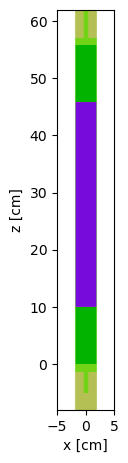

In [8]:
# Fuel element 101
fuel_101_universe = openmc.Universe(name='UZrH Fuel 101 Universe')

fuel_101_cell = openmc.Cell(name='Fuel 101', cell_id = cellid)
fuel_101_cell.fill = Fuel101
fuel_101_cell.region = -r_fuel_101 & +bot_active_101 & -top_active_101

cellid += 1
sm_top_101_cell = openmc.Cell(name='Sm disk top 101', cell_id = cellid)
sm_top_101_cell.fill = Samarium
sm_top_101_cell.region = -r_fuel_101 & +top_active_101 & -Sm_top_101

cellid += 1
graphite_top_101_cell = openmc.Cell(name='graphite top 101', cell_id = cellid)
graphite_top_101_cell.fill = Graphite
graphite_top_101_cell.region = -r_fuel_101 & +Sm_top_101 & -reflector_top_101

cellid += 1
sm_bot_101_cell = openmc.Cell(name='Sm disk bot 101', cell_id = cellid)
sm_bot_101_cell.fill = Samarium
sm_bot_101_cell.region = -r_fuel_101 & +Sm_bot_101 & -bot_active_101

cellid += 1
graphite_bot_101_cell = openmc.Cell(name='graphite bot 101', cell_id = cellid)
graphite_bot_101_cell.fill = Graphite
graphite_bot_101_cell.region = -r_fuel_101 & +reflector_bot_101 & -Sm_bot_101

cellid += 1
clad_101_cell = openmc.Cell(name='Al Cladding', cell_id = cellid)
clad_101_cell.fill = CladdingAl
clad_101_cell.region = -r_clad_101 & +r_fuel_101 & +reflector_bot_101 & -reflector_top_101

cellid += 1
clad_top_101_cell = openmc.Cell(name='Al Cladding top', cell_id = cellid)
clad_top_101_cell.fill = CladdingAl
clad_top_101_cell.region = -r_clad_101 & +reflector_top_101 & -clad_top_101

cellid += 1
clad_bot_101_cell = openmc.Cell(name='Al Cladding bot', cell_id = cellid)
clad_bot_101_cell.fill = CladdingAl
clad_bot_101_cell.region = -r_clad_101 & +clad_bot_101 & -reflector_bot_101

cellid += 1
plug_top_101_cell = openmc.Cell(name='top plug', cell_id = cellid)
plug_top_101_cell.fill = CladdingAl
plug_top_101_cell.region = -plug_radius_101 & +clad_top_101 & -plug_top_101

cellid += 1
plug_bot_101_cell = openmc.Cell(name='bot plug', cell_id = cellid)
plug_bot_101_cell.fill = CladdingAl
plug_bot_101_cell.region = -plug_radius_101 & +bottom_grid_top & -clad_bot_101

cellid += 1
plug_w_101_cell = openmc.Cell(name='top plug water', cell_id = cellid)
plug_w_101_cell.fill = Water
plug_w_101_cell.region = +plug_radius_101 & -r_clad_101 &+clad_top_101 & -plug_top_101

cellid += 1
water_top_fuel_101_cell=openmc.Cell(cell_id = cellid)
water_top_fuel_101_cell.fill = Water
water_top_fuel_101_cell.region = -r_clad_101 & +plug_top_101 &-end_domain_top

cellid += 1
water_bot_fuel_101_cell=openmc.Cell(cell_id = cellid)
water_bot_fuel_101_cell.fill = Water
water_bot_fuel_101_cell.region = -r_clad_101 & +end_domain_bot &-clad_bot_101


fuel_101_universe.add_cell(fuel_101_cell)
fuel_101_universe.add_cell(sm_top_101_cell)
fuel_101_universe.add_cell(graphite_top_101_cell)
fuel_101_universe.add_cell(sm_bot_101_cell)
fuel_101_universe.add_cell(graphite_bot_101_cell)
fuel_101_universe.add_cell(clad_101_cell)
fuel_101_universe.add_cell(clad_top_101_cell)
fuel_101_universe.add_cell(clad_bot_101_cell)
fuel_101_universe.add_cell(plug_top_101_cell)
fuel_101_universe.add_cell(plug_bot_101_cell)
fuel_101_universe.add_cell(plug_w_101_cell)
fuel_101_universe.add_cell(water_top_fuel_101_cell)
fuel_101_universe.add_cell(water_bot_fuel_101_cell)

if inline_plot:
    fuel_101_universe.plot(origin=(0,0,27), width=(10.0, 70.0), pixels=[400, 400], basis='xz', color_by='material')

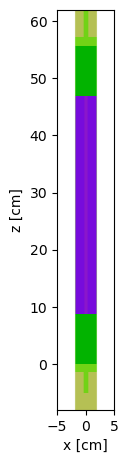

In [10]:
# Fuel element 103
fuel_103_universe = openmc.Universe(name='UZrH Fuel 103 Universe')

cellid += 1
Zr_rod_103_cell = openmc.Cell(name='Zr thin rod', cell_id = cellid)
Zr_rod_103_cell.fill = Zirconium
Zr_rod_103_cell.region = -r_fuel_inner_103 & +bot_active_103 & -top_active_103

cellid += 1
fuel_103_cell = openmc.Cell(name='Fuel 103', cell_id = cellid)
fuel_103_cell.fill = Fuel103
fuel_103_cell.region = -r_fuel_outer_103 & +r_fuel_inner_103 & +bot_active_103 & -top_active_103

cellid += 1
graphite_top_103_cell = openmc.Cell(name='graphite top 103', cell_id = cellid)
graphite_top_103_cell.fill = Graphite
graphite_top_103_cell.region = -r_fuel_outer_103 & +top_active_103 & -reflector_top_103

cellid += 1
graphite_bot_103_cell = openmc.Cell(name='graphite bot 103', cell_id = cellid)
graphite_bot_103_cell.fill = Graphite
graphite_bot_103_cell.region = -r_fuel_outer_103 & +reflector_bot_103 & -bot_active_103

cellid += 1
clad_103_cell = openmc.Cell(name='SS Cladding 103', cell_id = cellid)
clad_103_cell.fill = CladdingSS
clad_103_cell.region = -r_clad_103 & +r_fuel_outer_103 & +reflector_bot_103 & -reflector_top_103

cellid += 1
clad_top_103_cell = openmc.Cell(name='SS Cladding top 103', cell_id = cellid)
clad_top_103_cell.fill = CladdingSS
clad_top_103_cell.region = -r_clad_103 & +reflector_top_103 & -clad_top_103

cellid += 1
clad_bot_103_cell = openmc.Cell(name='SS Cladding bot 103', cell_id = cellid)
clad_bot_103_cell.fill = CladdingSS
clad_bot_103_cell.region = -r_clad_103 & +clad_bot_103 & -reflector_bot_103

cellid += 1
plug_top_103_cell = openmc.Cell(name='top plug 103', cell_id = cellid)
plug_top_103_cell.fill = CladdingSS
plug_top_103_cell.region = -plug_radius_103 & +clad_top_103 & -plug_top_103

cellid += 1
plug_bot_103_cell = openmc.Cell(name='bot plug 103', cell_id = cellid)
plug_bot_103_cell.fill = CladdingSS
plug_bot_103_cell.region = -plug_radius_103 & +bottom_grid_top & -clad_bot_103

cellid += 1
plug_w_103_cell = openmc.Cell(name='top plug water 103', cell_id = cellid)
plug_w_103_cell.fill = Water
plug_w_103_cell.region = +plug_radius_103 & -r_clad_103 &+clad_top_103 & -plug_top_103

cellid += 1
water_top_fuel_103_cell=openmc.Cell(cell_id = cellid)
water_top_fuel_103_cell.fill = Water
water_top_fuel_103_cell.region = -r_clad_103 & +plug_top_103 &-end_domain_top

cellid += 1
water_bot_fuel_103_cell=openmc.Cell(cell_id = cellid)
water_bot_fuel_103_cell.fill = Water
water_bot_fuel_103_cell.region = -r_clad_103 & ~plug_bot_103_cell.region & +end_domain_bot &-clad_bot_103


fuel_103_universe.add_cell(Zr_rod_103_cell)
fuel_103_universe.add_cell(fuel_103_cell)
fuel_103_universe.add_cell(graphite_top_103_cell)
fuel_103_universe.add_cell(graphite_bot_103_cell)
fuel_103_universe.add_cell(clad_103_cell)
fuel_103_universe.add_cell(clad_top_103_cell)
fuel_103_universe.add_cell(clad_bot_103_cell)
fuel_103_universe.add_cell(plug_bot_103_cell)
fuel_103_universe.add_cell(plug_top_103_cell)
fuel_103_universe.add_cell(plug_w_103_cell)
fuel_103_universe.add_cell(water_top_fuel_103_cell)
fuel_103_universe.add_cell(water_bot_fuel_103_cell)

if inline_plot:
    fuel_103_universe.plot(origin=(0,0,27), width=(10.0, 70.0), pixels=[400, 400], basis='xz', color_by='material')

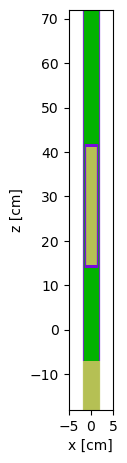

In [12]:
# Central Channel

# Condition for filling the Al case for void feedback measurements. If void_water = True, fill the case with water. Else, air
void_water = True 

if void_water: 
    FillingMaterial = Water 
else:
    FillingMaterial = Vacuum

central_channel_universe = openmc.Universe(name='CC Universe')

cellid += 1
central_channel_water = openmc.Cell(name='CC water below', cell_id = cellid)
central_channel_water.fill = Water
central_channel_water.region = -r_central_channel_clad & +end_domain_bot & -bottom_grid_bot

cellid += 1
central_channel_clad = openmc.Cell(name='CC clad', cell_id = cellid)
central_channel_clad.fill = CladdingAl
central_channel_clad.region = +r_central_channel & -r_central_channel_clad & +bottom_grid_bot & -end_domain_top

cellid += 1
central_channel_bot_cell = openmc.Cell(name='CC bot', cell_id = cellid)
central_channel_bot_cell.fill = Vacuum
central_channel_bot_cell.region = -r_central_channel & +bottom_grid_bot & -s_void_bot_out

cellid += 1
central_channel_top_cell = openmc.Cell(name='CC top', cell_id = cellid)
central_channel_top_cell.fill = Vacuum
central_channel_top_cell.region = -r_central_channel & +s_void_top_out & -end_domain_top


# 6 celle per il barilotto di void:
#0. and 1.  = inner part, top and bottom, 2.  = lateral clad, 3. and 4.  = clad, top and bottom, 5. = lateral void
cellid += 1
void_cc_0 = openmc.Cell(name = 'void cc inner bot', cell_id = cellid)
void_cc_0.fill = FillingMaterial
void_cc_0.region = -s_void_r_in & +s_void_bot_in & -s_void_sep

cellid += 1
void_cc_1 = openmc.Cell(name = 'void cc inner top', cell_id = cellid)
void_cc_1.fill = Vacuum 
void_cc_1.region = -s_void_r_in & +s_void_sep & -s_void_top_in

cellid += 1
void_cc_2 = openmc.Cell(name = 'void lateral clad', cell_id = cellid)
void_cc_2.fill = CladdingAl
void_cc_2.region = +s_void_r_in & -s_void_r_out & +s_void_bot_in & -s_void_top_in

cellid += 1
void_cc_3 = openmc.Cell(name = 'void bot clad', cell_id = cellid)
void_cc_3.fill = CladdingAl
void_cc_3.region = +s_void_bot_out & -s_void_bot_in & -s_void_r_out

cellid += 1
void_cc_4 = openmc.Cell(name = 'void top vlad', cell_id = cellid)
void_cc_4.fill = CladdingAl
void_cc_4.region = +s_void_top_in & -s_void_top_out & -s_void_r_out

cellid += 1
void_cc_5 = openmc.Cell(name = 'void lateral vacuum', cell_id = cellid)
void_cc_5.fill = Vacuum
void_cc_5.region = +s_void_bot_out & -s_void_top_out & +s_void_r_out & -r_central_channel


central_channel_universe.add_cell(central_channel_bot_cell)
central_channel_universe.add_cell(central_channel_top_cell)
central_channel_universe.add_cell(central_channel_clad)
central_channel_universe.add_cell(central_channel_water)
central_channel_universe.add_cell(void_cc_0)
central_channel_universe.add_cell(void_cc_1)
central_channel_universe.add_cell(void_cc_2)
central_channel_universe.add_cell(void_cc_3)
central_channel_universe.add_cell(void_cc_4)
central_channel_universe.add_cell(void_cc_5)


if inline_plot:
    central_channel_universe.plot(origin=(0,0,27), width=(10.0, 90.0), pixels=[400, 400], basis='xz', color_by='material')

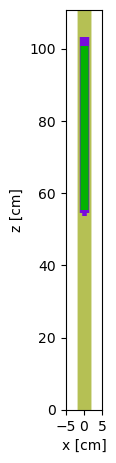

In [15]:
# TRANS rod
transient_universe = openmc.Universe(name='TRANS Universe')

cellid += 1
TRANS_cell = openmc.Cell(name='TRANS Cell', cell_id = cellid)
TRANS_cell.fill = ControlRodBorated #true
TRANS_cell.region = -r_trans_inner & +bot_trans & -top_trans 

cellid += 1
TRANS_clad = openmc.Cell(name='TRANS Clad Cell', cell_id = cellid)
TRANS_clad.fill = CladdingCR
TRANS_clad.region = -r_trans_outer & +r_trans_inner & +bot_trans & -top_trans

cellid += 1
TRANS_bot_clad_cell = openmc.Cell(name='TRANS clad bot cell', cell_id = cellid)
TRANS_bot_clad_cell.fill = CladdingCR
TRANS_bot_clad_cell.region = -r_trans_outer & +bot_trans_clad & -bot_trans

cellid += 1
TRANS_bot_plug_cell = openmc.Cell(name='TRANS clad bot plug', cell_id = cellid)
TRANS_bot_plug_cell.fill = CladdingCR
TRANS_bot_plug_cell.region = -r_trans_bot_plug & +bot_trans_plug & -bot_trans_clad

cellid += 1
TRANS_top_clad_cell = openmc.Cell(name='TRANS clad top cell', cell_id = cellid)
TRANS_top_clad_cell.fill = CladdingCR
TRANS_top_clad_cell.region = -r_trans_outer & +top_trans & -top_clad_trans

cellid += 1
TRANS_water_bot = openmc.Cell(name='TRANS water Cell', cell_id = cellid)
TRANS_water_bot.fill = Water
TRANS_water_bot.region = -r_clad_103 & +bottom_grid_top & -bot_trans_plug

cellid += 1
TRANS_water_bot_plug = openmc.Cell(name='TRANS water Cell bot plug', cell_id = cellid)
TRANS_water_bot_plug.fill = Water
TRANS_water_bot_plug.region = -r_clad_103 & +r_trans_bot_plug & -bot_trans_clad & +bot_trans_plug

cellid += 1
TRANS_water_top = openmc.Cell(name='TRANS water Cell', cell_id = cellid)
TRANS_water_top.fill = Water
TRANS_water_top.region = -r_clad_103 & +top_clad_trans & -end_domain_top

cellid += 1
TRANS_water_fill = openmc.Cell(name='TRANS water Cell for filling lattice', cell_id = cellid)
TRANS_water_fill.fill = Water
TRANS_water_fill.region = +r_trans_outer & -r_clad_103 & +bot_trans_clad & -top_clad_trans


transient_universe.add_cell(TRANS_cell)
transient_universe.add_cell(TRANS_clad)
transient_universe.add_cell(TRANS_water_top)
transient_universe.add_cell(TRANS_water_bot)
transient_universe.add_cell(TRANS_water_bot_plug)
transient_universe.add_cell(TRANS_water_fill)
transient_universe.add_cell(TRANS_top_clad_cell)
transient_universe.add_cell(TRANS_bot_clad_cell)
transient_universe.add_cell(TRANS_bot_plug_cell)

if inline_plot:
    transient_universe.plot(origin=(0,0,z0_trans), width=(10.0, 2*z0_trans), pixels=[400, 400], basis='xz', color_by='material')

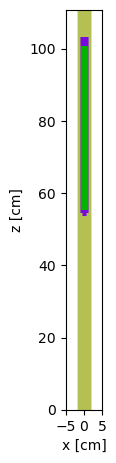

In [16]:
# REG rod
reg_universe = openmc.Universe(name='REG Universe')

cellid += 1 
REG_cell = openmc.Cell(name='REG Cell', cell_id = cellid)
REG_cell.fill = ControlRodB4C
REG_cell.region = -r_reg_inner & +bot_reg & -top_reg 

cellid += 1
REG_clad = openmc.Cell(name='REG Clad Cell', cell_id = cellid)
REG_clad.fill = CladdingCR
REG_clad.region = -r_reg_outer & +r_reg_inner & +bot_reg & -top_reg

cellid += 1
REG_bot_clad_cell = openmc.Cell(name='REG clad bot cell', cell_id = cellid)
REG_bot_clad_cell.fill = CladdingCR
REG_bot_clad_cell.region = -r_reg_outer & +bot_reg_clad & -bot_reg

cellid += 1
REG_bot_plug_cell = openmc.Cell(name='REG clad bot plug', cell_id = cellid)
REG_bot_plug_cell.fill = CladdingCR
REG_bot_plug_cell.region = -r_reg_bot_plug & +bot_reg_plug & -bot_reg_clad

cellid += 1
REG_top_clad_cell = openmc.Cell(name='REG clad top cell', cell_id = cellid)
REG_top_clad_cell.fill = CladdingCR
REG_top_clad_cell.region = -r_reg_outer & +top_reg & -top_clad_reg

cellid += 1
REG_water_top = openmc.Cell(name='REG water Cell', cell_id = cellid)
REG_water_top.fill = Water
REG_water_top.region = -r_clad_103 & +top_clad_reg & -end_domain_top

cellid += 1
REG_water_bot = openmc.Cell(name='REG water Cell', cell_id = cellid)
REG_water_bot.fill = Water
REG_water_bot.region = -r_clad_103 & +bottom_grid_top & -bot_reg_plug

cellid += 1
REG_water_bot_plug = openmc.Cell(name='REG water Cell plug', cell_id = cellid)
REG_water_bot_plug.fill = Water
REG_water_bot_plug.region = -r_clad_103 & +r_reg_bot_plug & -bot_reg_clad & +bot_reg_plug

cellid += 1
REG_water_fill = openmc.Cell(name='REG water Cell for filling lattice', cell_id = cellid)
REG_water_fill.fill = Water
REG_water_fill.region = +r_reg_outer & -r_clad_103 & +bot_reg_clad & -top_clad_reg


reg_universe.add_cell(REG_cell)
reg_universe.add_cell(REG_clad)
reg_universe.add_cell(REG_water_top)
reg_universe.add_cell(REG_water_bot)
reg_universe.add_cell(REG_water_bot_plug)
reg_universe.add_cell(REG_water_fill)
reg_universe.add_cell(REG_top_clad_cell)
reg_universe.add_cell(REG_bot_clad_cell)
reg_universe.add_cell(REG_bot_plug_cell)


if inline_plot:
    reg_universe.plot(origin=(0,0,z0_reg), width=(10, 2*z0_reg), pixels=[400, 400], basis='xz', color_by='material')

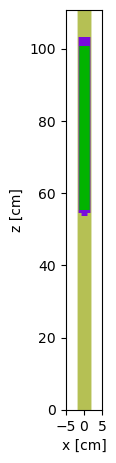

In [18]:
# SHIM rod
shim_universe = openmc.Universe(name='SHIM Universe')

cellid += 1
SHIM_cell = openmc.Cell(name='SHIM Cell', cell_id=cellid)
SHIM_cell.fill = ControlRodB4C
SHIM_cell.region = -r_shim_inner & +bot_shim & -top_shim 

cellid += 1
SHIM_clad = openmc.Cell(name='SHIM Clad Cell', cell_id=cellid)
SHIM_clad.fill = CladdingCR
SHIM_clad.region = -r_shim_outer & +r_shim_inner & +bot_shim & -top_shim

cellid += 1
SHIM_bot_clad_cell = openmc.Cell(name='SHIM clad bot cell', cell_id=cellid)
SHIM_bot_clad_cell.fill = CladdingCR
SHIM_bot_clad_cell.region = -r_shim_outer & +bot_shim_clad & -bot_shim

cellid += 1
SHIM_bot_plug_cell = openmc.Cell(name='SHIM clad bot plug', cell_id=cellid)
SHIM_bot_plug_cell.fill = CladdingCR
SHIM_bot_plug_cell.region = -r_shim_bot_plug & +bot_shim_plug & -bot_shim_clad

cellid += 1
SHIM_top_clad_cell = openmc.Cell(name='SHIM clad top cell', cell_id=cellid)
SHIM_top_clad_cell.fill = CladdingCR
SHIM_top_clad_cell.region = -r_shim_outer & +top_shim & -top_clad_shim


cellid += 1
SHIM_water_top = openmc.Cell(name='SHIM water Cell top', cell_id=cellid)
SHIM_water_top.fill = Water
SHIM_water_top.region = -r_clad_103 & +top_clad_shim & -end_domain_top

cellid += 1
SHIM_water_bot = openmc.Cell(name='SHIM water Cell bot', cell_id=cellid)
SHIM_water_bot.fill = Water
SHIM_water_bot.region = -r_clad_103 & +end_domain_bot & -bot_shim_plug

cellid += 1
SHIM_water_bot_plug = openmc.Cell(name='SHIM water Cell bot plug', cell_id=cellid)
SHIM_water_bot_plug.fill = Water
SHIM_water_bot_plug.region = -r_clad_103 & +r_shim_bot_plug  & +bot_shim_plug & -bot_shim_clad

cellid += 1
SHIM_water_fill = openmc.Cell(name='SHIM water Cell for filling lattice', cell_id=cellid)
SHIM_water_fill.fill = Water
SHIM_water_fill.region = +r_shim_outer & -r_clad_103 & +bot_shim_clad & -top_clad_shim

shim_universe.add_cell(SHIM_cell)
shim_universe.add_cell(SHIM_clad)
shim_universe.add_cell(SHIM_water_top)
shim_universe.add_cell(SHIM_water_bot)
shim_universe.add_cell(SHIM_water_bot_plug)
shim_universe.add_cell(SHIM_water_fill)
shim_universe.add_cell(SHIM_top_clad_cell)
shim_universe.add_cell(SHIM_bot_clad_cell)
shim_universe.add_cell(SHIM_bot_plug_cell)


if inline_plot:
    shim_universe.plot(origin=(0,0,z0_shim), width=(10, 2*z0_shim), pixels=[400, 400], basis='xz', color_by='material')

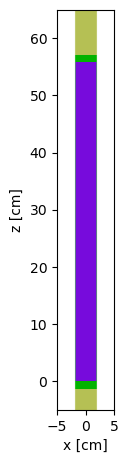

In [20]:
# Dummy channel (graphite) 
graphite_channel_universe = openmc.Universe(name='Graphite Channel Universe')

cellid += 1
graphite_channel_cell = openmc.Cell(name='Graphite channel Cell', cell_id=cellid)
graphite_channel_cell.fill = Graphite
graphite_channel_cell.region = -r_dummy_graphite & +reflector_bot_101 & -reflector_top_101

cellid += 1
graphite_clad = openmc.Cell(name='Graphite Clad Cell', cell_id=cellid)
graphite_clad.fill = CladdingCR
graphite_clad.region = -r_dummy_clad & +r_dummy_graphite & +reflector_bot_101 & -reflector_top_101

cellid += 1
dummy_top_plug_cell = openmc.Cell(name='Graphite channel Cell plug top', cell_id=cellid)
dummy_top_plug_cell.fill = CladdingCR
dummy_top_plug_cell.region = -r_dummy_clad & +reflector_top_101 & -clad_top_101

cellid += 1
dummy_bot_plug_cell = openmc.Cell(name='Graphite channel Cell plug bot', cell_id=cellid)
dummy_bot_plug_cell.fill = CladdingCR
dummy_bot_plug_cell.region = -r_dummy_clad & +clad_bot_101 & -reflector_bot_101

cellid += 1
dummy_bot_water_cell = openmc.Cell(cell_id=cellid)
dummy_bot_water_cell.fill = Water
dummy_bot_water_cell.region = -r_dummy_clad & -clad_bot_101 & +end_domain_bot

cellid += 1
dummy_top_water_cell = openmc.Cell(cell_id=cellid)
dummy_top_water_cell.fill = Water
dummy_top_water_cell.region = -r_dummy_clad & +clad_top_101 & -end_domain_top


graphite_channel_universe.add_cell(graphite_channel_cell)
graphite_channel_universe.add_cell(graphite_clad)
graphite_channel_universe.add_cell(dummy_top_plug_cell)
graphite_channel_universe.add_cell(dummy_bot_plug_cell)
graphite_channel_universe.add_cell(dummy_top_water_cell)
graphite_channel_universe.add_cell(dummy_bot_water_cell)


if inline_plot:
    graphite_channel_universe.plot(origin=(0,0,30), width=(10, 70), pixels=[400, 400], basis='xz', color_by='material')

In [21]:
# Rabbit & Source empty channels
rabbit_universe = openmc.Universe(name='Rabbit Universe')

cellid += 1
rabbit_cell = openmc.Cell(name='Rabbit', cell_id=cellid)
rabbit_cell.fill = Vacuum
rabbit_cell.region = -r_rabbit_inner & +bottom_grid_top & -end_domain_top

cellid += 1
rabbit_clad = openmc.Cell(name='Rabbit clad', cell_id=cellid)
rabbit_clad.fill = CladdingCR
rabbit_clad.region = +r_rabbit_inner & -r_rabbit_outer & +bottom_grid_top & -end_domain_top

rabbit_universe.add_cell(rabbit_cell)
rabbit_universe.add_cell(rabbit_clad)

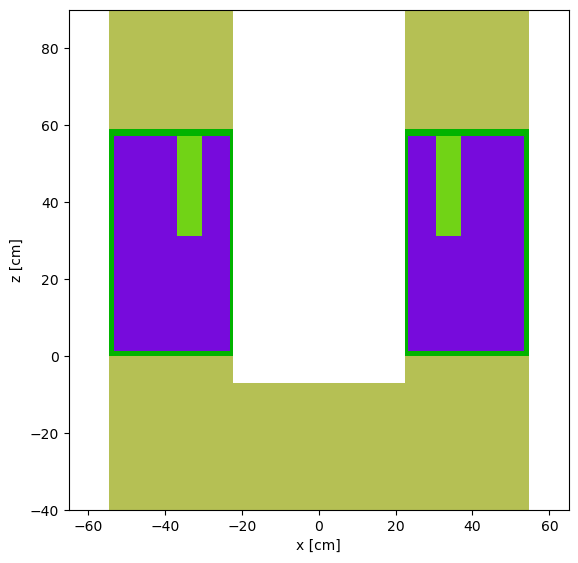

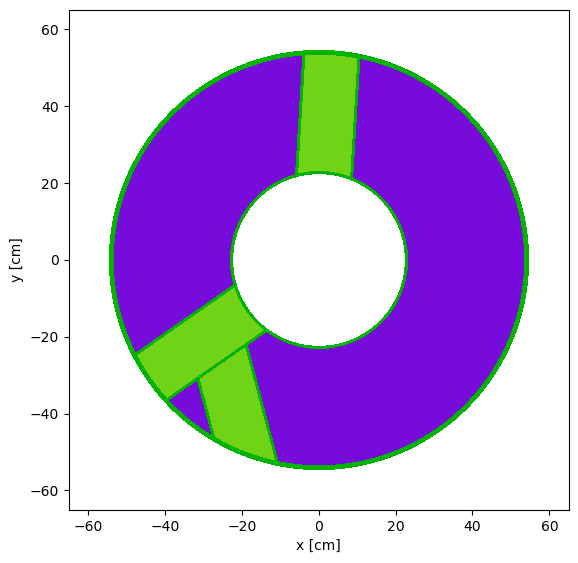

In [22]:
# Reflector 
reflector_universe = openmc.Universe(name='Reflector')

# Create reflector cell
# --> 4 void zones inside the reflector: 1 cylindrical annulus and 3 channels

# Cylindrical ring between 31.35 and 57
cellid += 1
reflector_cell_down = openmc.Cell(name='Reflector cell down', cell_id=cellid)
reflector_cell_down.fill = Graphite
reflector_cell_down.region = -outer_radius_reflector & +inner_radius_reflector & +bot_reflector & -refl_void_b & +channel_1_outer & +channel_2_outer & +channel_3_outer #aggiungere canali

cellid += 1
reflector_cell_fill_ch1 = openmc.Cell(name='Reflector cell fill ch1', cell_id=cellid)
reflector_cell_fill_ch1.fill = Graphite
reflector_cell_fill_ch1.region = -outer_radius_reflector & +inner_radius_reflector & +bot_reflector & -refl_void_b & -channel_1_outer & -channel_1_discriminator

cellid += 1
reflector_cell_fill_ch2 = openmc.Cell(name='Reflector cell fill ch2', cell_id=cellid)
reflector_cell_fill_ch2.fill = Graphite
reflector_cell_fill_ch2.region = -outer_radius_reflector & +inner_radius_reflector & +bot_reflector & -refl_void_b & -channel_2_outer & +channel_2_discriminator

cellid += 1
reflector_cell_fill_ch3 = openmc.Cell(name='Reflector cell fill ch3', cell_id=cellid)
reflector_cell_fill_ch3.fill = Graphite
reflector_cell_fill_ch3.region = -outer_radius_reflector & +inner_radius_reflector & +bot_reflector & -refl_void_b & -channel_3_outer & +channel_3_discriminator & +channel_2_outer

cellid += 1
reflector_cell_right_vacuum = openmc.Cell(name='Reflector right side from vacuum', cell_id=cellid)
reflector_cell_right_vacuum.fill = Graphite
reflector_cell_right_vacuum.region = -refl_void_inner & +inner_radius_reflector & +refl_void_b & -top_reflector

cellid += 1
reflector_cell_left_vacuum = openmc.Cell(name='Reflector left side from vacuum', cell_id=cellid)
reflector_cell_left_vacuum.fill = Graphite
reflector_cell_left_vacuum.region = +refl_void_outer & -outer_radius_reflector & +refl_void_b & -top_reflector 

# lazy susan
cellid += 1
reflector_cell_vacuum = openmc.Cell(name='Reflector vacuum', cell_id=cellid)
reflector_cell_vacuum.fill = Vacuum
reflector_cell_vacuum.region = -refl_void_outer & +refl_void_inner & +refl_void_b & -top_reflector #aggiungere canali

cellid += 1
reflector_clad_bot = openmc.Cell(name='Reflector clad bot', cell_id=cellid)
reflector_clad_bot.fill = CladdingCR
reflector_clad_bot.region = +core_radius & -s1 & +bot_clad_reflector & -bot_reflector

cellid += 1
reflector_clad_top = openmc.Cell(name='Reflector clad top', cell_id=cellid)
reflector_clad_top.fill = CladdingCR
reflector_clad_top.region = +core_radius & -s1 & +top_reflector & -top_clad_reflector

cellid += 1
reflector_clad_side_inner = openmc.Cell(name='Reflector clad side inner', cell_id=cellid)
reflector_clad_side_inner.fill = CladdingCR
reflector_clad_side_inner.region = +core_radius & -inner_radius_reflector & +bot_reflector & -top_reflector

cellid += 1
reflector_clad_side_outer = openmc.Cell(name='Reflector clad side outer', cell_id=cellid)
reflector_clad_side_outer.fill = CladdingCR
reflector_clad_side_outer.region = +outer_radius_reflector & -s1 & +bot_reflector & -top_reflector


#CHANNELS
cellid += 1
reflector_ch1 = openmc.Cell(name='irradiation channel 1', cell_id=cellid)
reflector_ch1.fill = Vacuum
reflector_ch1.region = -channel_1_inner & +inner_radius_reflector & -outer_radius_reflector & +channel_1_discriminator

cellid += 1
reflector_ch1_clad = openmc.Cell(name='clad irradiation channel 1', cell_id=cellid)
reflector_ch1_clad.fill = CladdingCR
reflector_ch1_clad.region = +channel_1_inner & -channel_1_outer & +inner_radius_reflector & -outer_radius_reflector & +channel_1_discriminator

cellid += 1
reflector_ch2 = openmc.Cell(name='irradiation channel 2', cell_id=cellid)
reflector_ch2.fill = Vacuum
reflector_ch2.region = -channel_2_inner & +inner_radius_reflector & -outer_radius_reflector & -channel_2_discriminator

cellid += 1
reflector_ch2_clad = openmc.Cell(name='clad irradiation channel 2', cell_id=cellid)
reflector_ch2_clad.fill = CladdingCR
reflector_ch2_clad.region = +channel_2_inner & -channel_2_outer & +inner_radius_reflector & -outer_radius_reflector & -channel_2_discriminator

cellid += 1
reflector_ch3 = openmc.Cell(name='irradiation channel 3', cell_id=cellid)
reflector_ch3.fill = Vacuum
reflector_ch3.region = -channel_3_inner & +channel_2_outer & -outer_radius_reflector & -channel_3_discriminator

cellid += 1
reflector_ch3_clad = openmc.Cell(name='clad irradiation channel 3', cell_id=cellid)
reflector_ch3_clad.fill = CladdingCR
reflector_ch3_clad.region = +channel_3_inner & -channel_3_outer & +channel_2_outer & -outer_radius_reflector & -channel_3_discriminator

cellid += 1
water_reflector_top= openmc.Cell(cell_id=cellid)
water_reflector_top.region= +top_clad_reflector & -end_domain_top & -s1 & +core_radius
water_reflector_top.fill = Water

cellid += 1
water_reflector_bottom= openmc.Cell(cell_id=cellid)
water_reflector_bottom.region= +end_domain_bot & -bottom_grid_bot & -s1
water_reflector_bottom.fill = Water

cellid += 1
water_reflector_bottom2= openmc.Cell(cell_id=cellid)
water_reflector_bottom2.region= -bot_clad_reflector & +bottom_grid_bot & -s1 & +core_radius
water_reflector_bottom2.fill = Water


reflector_universe.add_cell(reflector_cell_down)
reflector_universe.add_cell(reflector_cell_vacuum)
reflector_universe.add_cell(reflector_cell_right_vacuum)
reflector_universe.add_cell(reflector_cell_left_vacuum)
reflector_universe.add_cell(reflector_clad_bot)
reflector_universe.add_cell(reflector_clad_top)
reflector_universe.add_cell(reflector_clad_side_inner)
reflector_universe.add_cell(reflector_clad_side_outer)
reflector_universe.add_cell(reflector_ch1)
reflector_universe.add_cell(reflector_cell_fill_ch1)
reflector_universe.add_cell(reflector_ch1_clad)
reflector_universe.add_cell(reflector_ch2)
reflector_universe.add_cell(reflector_cell_fill_ch2)
reflector_universe.add_cell(reflector_ch2_clad)
reflector_universe.add_cell(reflector_ch3)
reflector_universe.add_cell(reflector_cell_fill_ch3)
reflector_universe.add_cell(reflector_ch3_clad)
reflector_universe.add_cell(water_reflector_top)
reflector_universe.add_cell(water_reflector_bottom)
reflector_universe.add_cell(water_reflector_bottom2)


if inline_plot:
    reflector_universe.plot(origin=(0,0,25), width=(130.0, 130), pixels=[500, 500], basis='xz', color_by='material')
    reflector_universe.plot(origin=(0,0,25), width=(130.0, 130), pixels=[500, 500], basis='xy', color_by='material')

Adding in a central channel rod...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a SHIM rod...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 103 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a transient rod...
Adding in a 101 Fuel type...
Adding in a 101 Fuel type...
Adding in a 1

/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=300.
  warn(msg, IDWarning)
/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=400.
  warn(msg, IDWarning)
/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=401.
  warn(msg, IDWarning)
/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=402.
  warn(msg, IDWarning)
/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=403.
  warn(msg, IDWarning)
/home/renato/miniconda3/envs/mc015/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Cell instance already exists with id=404.
  warn(msg, IDW

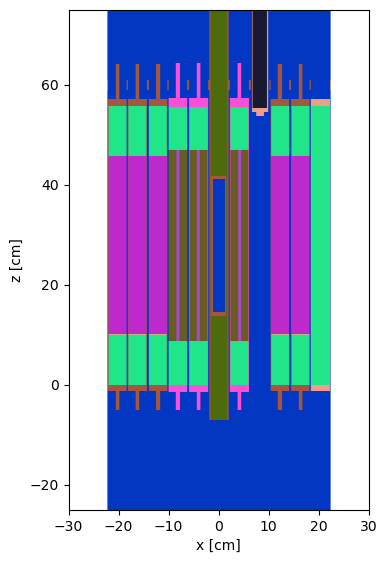

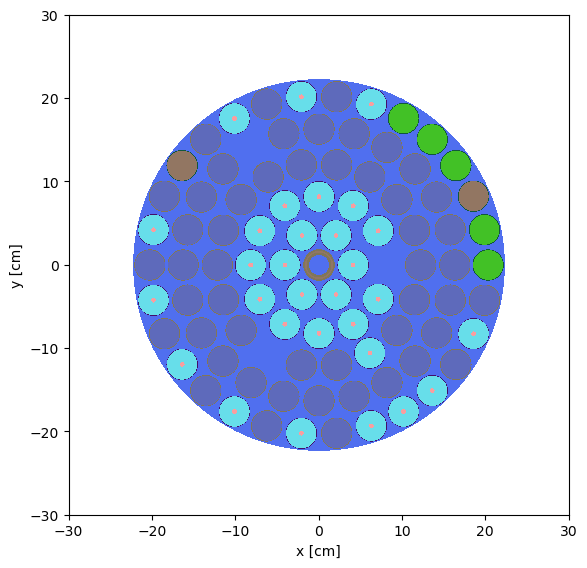

In [25]:
# Core universe

# Create surfaces that will divide rings in the circular lattice
ring_radii = np.array([0.0, 4.0975, 8.2, 12.2, 16.3, 20.3])# From Riccardo Boccelli MSc thesis
radial_surf = [openmc.ZCylinder(r=r) for r in
               (ring_radii[:-1] + ring_radii[1:])/2]

water_cells_down = []
water_cells_up = []
top_grid_cells = []
for i in range(ring_radii.size):
    # Create annular region
    if i == 0:
        water_region_down = -radial_surf[i] & -top_grid_bot 
        water_region_up = -radial_surf[i] & +top_grid_top
        grid_region = -radial_surf[i] & +top_grid_bot & -top_grid_top
    elif i == ring_radii.size - 1:
        water_region_down = -top_grid_bot & +radial_surf[i-1] & -core_radius 
        water_region_up = +top_grid_top & +radial_surf[i-1] & -core_radius
        grid_region = +radial_surf[i-1] & +top_grid_bot & -top_grid_top
    else:
        water_region_down = -top_grid_bot & +radial_surf[i-1] & -radial_surf[i]  
        water_region_up = +top_grid_top & +radial_surf[i-1] & -radial_surf[i] 
        grid_region = +radial_surf[i-1] & -radial_surf[i] & +top_grid_bot & -top_grid_top
    
    cellid +=1 
    water_cell_down = openmc.Cell(fill=Water, region=water_region_down, cell_id=cellid)
    
    cellid +=1 
    water_cell_up = openmc.Cell(fill=Water, region=water_region_up, cell_id=cellid)
 
    cellid +=1 
    top_grid_cell = openmc.Cell(fill=CladdingAl, region=grid_region, cell_id=cellid)
    top_grid_cells.append(top_grid_cell) 
 
    water_cells_down.append(water_cell_down)
    water_cells_up.append(water_cell_up)
   

core_universe = openmc.Universe()
core_universe.add_cells(water_cells_down)
core_universe.add_cells(water_cells_up)
core_universe.add_cells(top_grid_cells)


# Arrange the pins in the circular lattice 
num_pins = [1, 6, 12, 18, 24, 30]
angles = [0, 0, 0, 0, 0, 0]
#angles = [0, 30, 0, 30, 0, 30]

# In order to insert pin in the lattice, it is needed to define first the parameters for the spatial location.
# In particular: 'numPins' identifies the ring, and 'howleft' the angular degree

centralChannel = {'numPins':[num_pins[0]], # Here the 'howLeft' parameter it is not necessary due to only one pin
                  'howLeftFrom3oclock':[0]}

REG = {'numPins'  :[num_pins[4]],
       'howLeftFrom3oclock':[7]}

TRANS = {'numPins' : [num_pins[3]],
         'howLeftFrom3oclock':[11]}

SHIM = {'numPins' : [num_pins[2]],
        'howLeftFrom3oclock':[-1]}

waterRods = {'numPins'  :[num_pins[5], num_pins[5]],
             'howLeftFrom3oclock': [1,11]}

graphiteRods = {'numPins' : np.full(5, num_pins[5]),
                'howLeftFrom3oclock':[-1,0,2,3,4]}

# 6 pin in ring 1, 11 in ring 2 and so on
Fuel_1033 = {'numPins': [num_pins[1],num_pins[1],num_pins[1],num_pins[1],num_pins[1],num_pins[1],
                        
                        num_pins[2], num_pins[2], num_pins[2],num_pins[2], num_pins[2], num_pins[2], num_pins[2],num_pins[2],
                        num_pins[2],num_pins[2],num_pins[2],

                        num_pins[3], 

                        num_pins[5], num_pins[5], num_pins[5], num_pins[5], num_pins[5], num_pins[5], num_pins[5], num_pins[5],
                        num_pins[5], num_pins[5], num_pins[5], num_pins[5] 
                        ],
                'howLeftFrom3oclock': [-1,0,1,2,3,4,    0,1,2,3,4,5,6,7,8,9,10,  14,   5,7,9,13,15,17,19,21,23,24,25,27     ] }


#corona 3, ho (18-2) pins
Fuel_1011 = {'numPins': [num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], num_pins[3], 

                        num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], num_pins[4], 

                        num_pins[5], num_pins[5], num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5],  num_pins[5]

                        ],
                'howLeftFrom3oclock': [-1,0,1,2,3,4,5,6,7,8,9,10,12,13,15,16,   -1,0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,     6,8,10,12,14,16,18,20,22,26,28] }



# Here I define some variables in order to locate the pins in the next for iteration

def CentralChannel(centralChannel,n,j):
    for irod in range(len(centralChannel['numPins'])): 
        if n   == centralChannel['numPins'][irod]:
                return True
    return False

def REGChannel(REG,n,j):
    for irod in range(len(REG['numPins'])): 
        if n   == REG['numPins'][irod] and \
           j-1 == REG['howLeftFrom3oclock'][irod]:
                return True
    return False

def SHIMChannel(SHIM,n,j):
    for irod in range(len(SHIM['numPins'])): 
        if n   == SHIM['numPins'][irod] and \
           j-1 == SHIM['howLeftFrom3oclock'][irod]:
                return True
    return False

def TransientRod(TRANS,n,j):
    for irod in range(len(TRANS['numPins'])): 
        if n   == TRANS['numPins'][irod] and \
           j-1 == TRANS['howLeftFrom3oclock'][irod]:
                return True
    return False

def WaterRod(waterRods,n,j):
    for irod in range(len(waterRods['numPins'])): 
        if n   == waterRods['numPins'][irod] and \
           j-1 == waterRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def GraphiteRod(graphiteRods,n,j):
    for irod in range(len(graphiteRods['numPins'])): 
        if n   == graphiteRods['numPins'][irod] and \
           j-1 == graphiteRods['howLeftFrom3oclock'][irod]:
                return True
    return False

def Fuel_103(Fuel_1033,n,j):
    for irod in range(len(Fuel_1033['numPins'])): 
        if n   == Fuel_1033['numPins'][irod] and \
           j-1 == Fuel_1033['howLeftFrom3oclock'][irod]:
                return True
    return False


def Fuel_101(Fuel_1011,n,j):
    for irod in range(len(Fuel_1011['numPins'])): 
        if n   == Fuel_1011['numPins'][irod] and \
           j-1 == Fuel_1011['howLeftFrom3oclock'][irod]:
                return True
    return False



# Filling the core
for i, (r, n, a) in enumerate(zip(ring_radii, num_pins, angles)):

    for j in range(n):
    
        # Determine location of center of pin
        theta = (a + j/n*360.) * np.pi/180.
        x = r*np.cos(theta)
        y = r*np.sin(theta)
        cellid += 1
    
        pin_boundary = openmc.ZCylinder(x0=x, y0=y, r=r_clad_101.r)
        pin_boundary_CC = openmc.ZCylinder(x0=x, y0=y, r=r_central_channel_clad.r)
        water_cells_down[i].region &= +pin_boundary & -core_radius
        water_cells_up[i].region &= +pin_boundary & -core_radius
        top_grid_cells[i].region &= +pin_boundary & -core_radius

        # Create each fuel pin -- note that we explicitly assign an ID so 
        # that we can identify the pin later when looking at tallies
        if CentralChannel(centralChannel,n,j):
            print('Adding in a central channel rod...')
            pin = openmc.Cell(fill=central_channel_universe, region=-pin_boundary_CC, cell_id=cellid)
        elif TransientRod(TRANS,n,j):
            print('Adding in a transient rod...')
            pin = openmc.Cell(fill=transient_universe, region=-pin_boundary, cell_id=cellid)
        elif WaterRod(waterRods,n,j):
            print('Adding in a water rod...')
            pin = openmc.Cell(fill=rabbit_universe, region=-pin_boundary, cell_id=cellid)
        elif SHIMChannel(SHIM,n,j):
            print('Adding in a SHIM rod...')
            pin = openmc.Cell(fill=shim_universe, region=-pin_boundary, cell_id=cellid)
        elif REGChannel(REG,n,j):
            print('Adding in a REG rod...')
            pin = openmc.Cell(fill=reg_universe, region=-pin_boundary, cell_id=cellid)
        elif GraphiteRod(graphiteRods,n,j):
            print('Adding in a graphite rod...')
            pin = openmc.Cell(fill=graphite_channel_universe, region=-pin_boundary, cell_id=cellid)
        elif Fuel_103(Fuel_1033,n,j):
            print('Adding in a 103 Fuel type...')
            pin = openmc.Cell(fill=fuel_103_universe, region=-pin_boundary, cell_id=cellid)

        elif Fuel_101(Fuel_1011,n,j):
            print('Adding in a 101 Fuel type...')
            pin = openmc.Cell(fill=fuel_101_universe, region=-pin_boundary, cell_id=cellid)
  
        pin.translation = (x, y, 0)
        pin.id = (i + 3)*100 + j 
        core_universe.add_cell(pin)


if inline_plot:
    core_universe.plot(origin=(0,0,25), width=(60.0, 100), pixels=[500, 500], basis='xz', color_by='material', seed = 3)

if inline_plot:
    core_universe.plot(origin=(0,0,25), width=(60.0, 60), pixels=[500, 500], basis='xy', color_by='material', seed = 2)

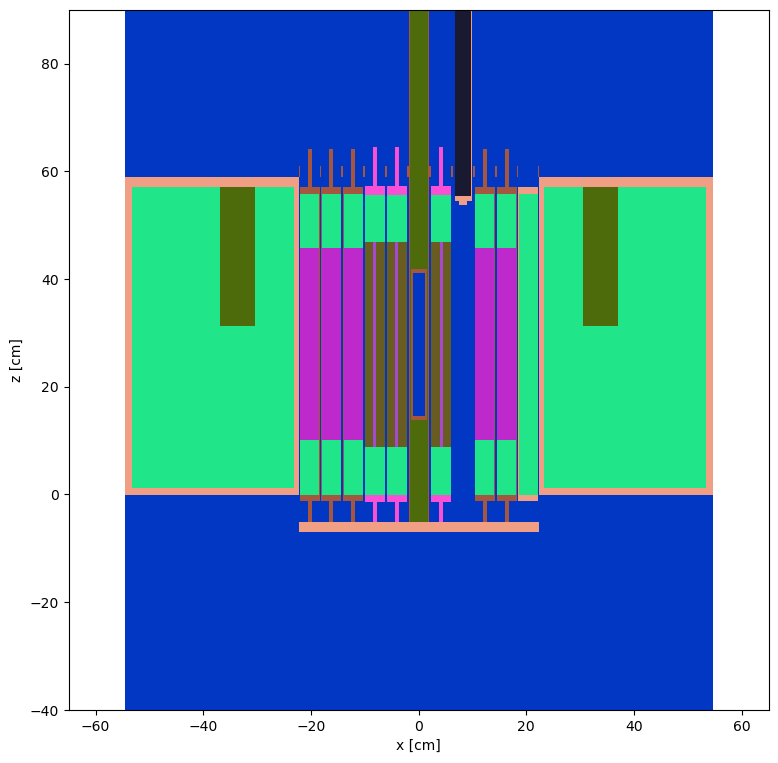

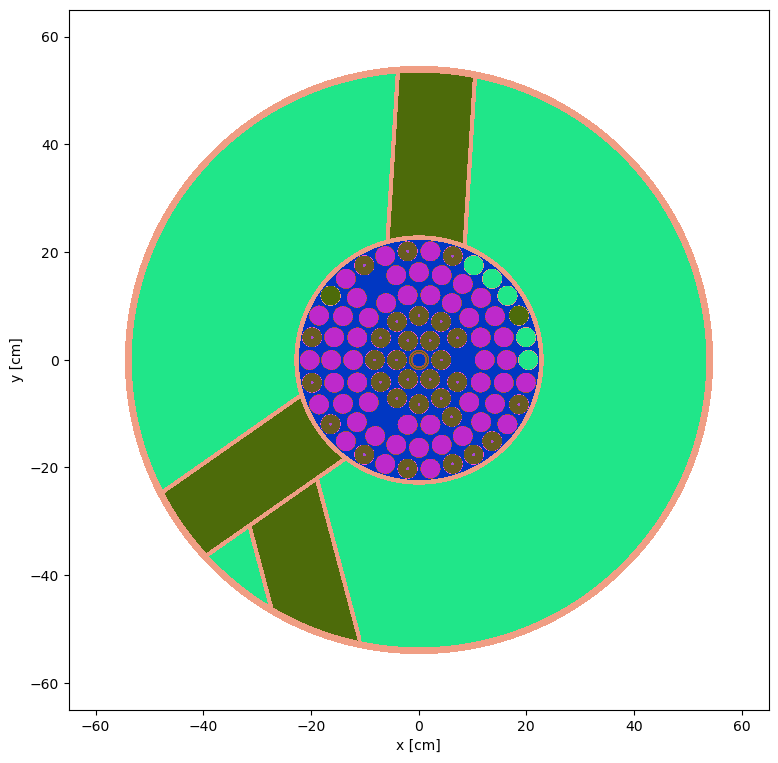

In [26]:
# Geometry definitions for the reactor

cellid += 1
reactor = openmc.Cell(cell_id = cellid)
reactor.region = -core_radius & -end_domain_top & +bottom_grid_top
reactor.fill = core_universe

cellid += 1
reflector = openmc.Cell(cell_id = cellid)
reflector.region = +core_radius & -s1 & +end_domain_bot & -end_domain_top
reflector.fill = reflector_universe

cellid += 1
bottom_grid_cell = openmc.Cell(name='bottom grid cell', cell_id = cellid)
bottom_grid_cell.fill = CladdingCR
bottom_grid_cell.region = -core_radius & +bottom_grid_bot & -bottom_grid_top

cellid += 1
bottom_grid_cell_water = openmc.Cell(name='bottom grid cell', cell_id = cellid)
bottom_grid_cell_water.fill = Water
bottom_grid_cell_water.region = -core_radius & -bottom_grid_bot & +end_domain_bot


### --- ROOT UNIVERSE   
triga_universe = openmc.Universe(name='TRIGA universe')

triga_universe.add_cell(reactor)
triga_universe.add_cell(reflector)
triga_universe.add_cell(bottom_grid_cell)
triga_universe.add_cell(bottom_grid_cell_water)


geometry = openmc.Geometry((triga_universe))

if inline_plot:
    triga_universe.plot(origin=(0,0,25), width=(130.0, 130), pixels=[700, 700], basis='xz', color_by='material', seed = 3)

if inline_plot:
    triga_universe.plot(origin=(0,0,25), width=(130.0, 130), pixels=[700, 700], basis='xy', color_by='material', seed = 3)

## Plots

In [27]:
# Plot definition

folder_path = './pictures/geometry/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76), }

plot_xy1 = openmc.Plot()
plot_xy1.basis = 'xy'
plot_xy1.origin = (0.0, 0.0, 23.15-7) #23.15 , 28.15, 10.4 (start CR)
plot_xy1.width = (110, 110)
plot_xy1.pixels = (2000, 2000)
plot_xy1.color_by = 'material'
plot_xy1.filename = folder_path+'view_xy1'
plot_xy1.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_xy2 = openmc.Plot()
plot_xy2.basis = 'xy'
plot_xy2.origin = (0.0, 0.0, 23.15-4) #23.15 , 28.15, 10.4 (start CR)
plot_xy2.width = (110, 110)
plot_xy2.pixels = (2000, 2000)
plot_xy2.color_by = 'material'
plot_xy2.filename = folder_path+'view_xy2'
plot_xy2.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_xy3 = openmc.Plot()
plot_xy3.basis = 'xy'
plot_xy3.origin = (0.0, 0.0, 23.15) #23.15 , 28.15, 10.4 (start CR)
plot_xy3.width = (110, 110)
plot_xy3.pixels = (2000, 2000)
plot_xy3.color_by = 'material'
plot_xy3.filename = folder_path+'view_xy3'
plot_xy3.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_xy4 = openmc.Plot()
plot_xy4.basis = 'xy'
plot_xy4.origin = (0.0, 0.0, 23.15 + 2) #23.15 , 28.15, 10.4 (start CR)
plot_xy4.width = (110, 110)
plot_xy4.pixels = (2000, 2000)
plot_xy4.color_by = 'material'
plot_xy4.filename = folder_path+'view_xy4'
plot_xy4.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_xy5 = openmc.Plot()
plot_xy5.basis = 'xy'
plot_xy5.origin = (0.0, 0.0, 23.15+4) #23.15 , 28.15, 10.4 (start CR)
plot_xy5.width = (110, 110)
plot_xy5.pixels = (2000, 2000)
plot_xy5.color_by = 'material'
plot_xy5.filename = folder_path+'view_xy5'
plot_xy5.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_xy6 = openmc.Plot()
plot_xy6.basis = 'xy'
plot_xy6.origin = (0.0, 0.0, 23.15 + 7) #23.15 , 28.15, 10.4 (start CR)
plot_xy6.width = (110, 110)
plot_xy6.pixels = (2000, 2000)
plot_xy6.color_by = 'material'
plot_xy6.filename = folder_path+'view_xy6'
plot_xy6.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}

plot_vista_shim = openmc.Plot()
plot_vista_shim.basis = 'xz'
plot_vista_shim.origin = (0.0, 0, 0)
plot_vista_shim.width = (110, 230)
plot_vista_shim.pixels = (2000, 2000)
plot_vista_shim.color_by = 'material'
plot_vista_shim.filename = folder_path+'view_shim'
plot_vista_shim.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}


plot_vista_reg = openmc.Plot()
plot_vista_reg.basis = 'xz'
plot_vista_reg.origin = (0, 14.9, 0)
plot_vista_reg.width = (110, 150)
plot_vista_reg.pixels = (3000, 3000)
plot_vista_reg.color_by = 'material'
plot_vista_reg.filename = folder_path+'view_reg'
plot_vista_reg.colors = {
    Water: (0,102,204),
    CladdingSS: (190,190,190), 
    CladdingCR: (196,196,196),
    CladdingAl: (200,200,200),
    Fuel101: (255,30,30),
    Fuel103: (155,10,10),
    Graphite: (110,110,110),
    Vacuum: (249,255,227),
    ControlRodB4C: (152,251,152),
    ControlRodBorated: (152,251,152),
    Samarium: (255,255,51),
    Zirconium: (0,153,76),

}


plot_vista_trans = openmc.Plot()
plot_vista_trans.basis = 'xz'
plot_vista_trans.origin = (0, -11.5, 0)
plot_vista_trans.width = (110, 150)
plot_vista_trans.pixels = (2000, 2000)
plot_vista_trans.color_by = 'material'
plot_vista_trans.filename = folder_path+'view_trans'
plot_vista_trans.colors = colors



plots = openmc.Plots()
plots.append(plot_xy1)
plots.append(plot_xy2)
plots.append(plot_xy3)
plots.append(plot_xy4)
plots.append(plot_xy5)
plots.append(plot_xy6)
plots.append(plot_vista_reg)
plots.append(plot_vista_shim)
plots.append(plot_vista_trans)



## Settings

In [29]:
# OpenMC simulation parameters 

entropy_calc = False
resonance_calc = False
uniform_source = True

batches = 300
inactive = 100
particles = 120000

settings_file = openmc.Settings()
settings_file.batches = batches
settings_file.inactive = inactive
settings_file.particles = particles

# uniform initial source
if uniform_source:
    bounds = [-25, -25, 5, 25, 25, 50]
    uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:])
    settings_file.source = openmc.Source(space=uniform_dist)

if resonance_calc:
    settings_file.resonance_scattering['enable'] = True

if entropy_calc:
    entropy_mesh = openmc.Mesh()
    entropy_mesh.lower_left = (-60, -60, -5)
    entropy_mesh.upper_right = (60, 60, 60)

    entropy_mesh.dimension = (10, 10, 10)
    settings_file.entropy_mesh = entropy_mesh

settings_file.temperature = {'method':'interpolation'}


## Tallies

In [30]:
# Measuring quantities during simulation
tallies_file = openmc.Tallies()

### Neutron energy flux 
energies = np.logspace(np.log10(1e-5), np.log10(20.0e6), 101)
e_filter = openmc.EnergyFilter(energies)

EnergySpectrum = openmc.Tally(name = "Phi(E)")
EnergySpectrum.filters = [e_filter]
EnergySpectrum.scores = ['flux']


### Spatial flux
mesh3D = openmc.RegularMesh()
mesh3D.dimension = (60, 60, 100)
mesh3D.lower_left = (-55, -55, -10)
mesh3D.upper_right = (55, 55, 100)

mesh3D_filter = openmc.MeshFilter(mesh3D)

SpatialFlux = openmc.Tally(name = "Phi(r)")
SpatialFlux.filters = [mesh3D_filter]
SpatialFlux.scores = ['flux']


### Deposited energy (for normalization)
heating = openmc.Tally(name='factor-for-normalization')
heating.scores = ['heating-local']

tallies_file.append(EnergySpectrum)
tallies_file.append(SpatialFlux)
tallies_file.append(heating)


In [31]:
# Export to XML
materials_file.export_to_xml()
geometry.export_to_xml()
plots.export_to_xml()
settings_file.export_to_xml()
tallies_file.export_to_xml()

openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [32]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [46]:
# os.system("mv statepoint.300.h5 ./h5_files/" + str(z0_reg-offset)+"_"+ str(z0_shim-offset) + "_" + str(z0_trans-offset)+".h5")

0